# This cell is auto-generated.

In [31]:
data = 0
while data not in [1, 2]:
    data = int(input('Which data set do you want to use? 1 = Test, 2 = Input '))

if data == 1:
    fp = 'Test/'
    fn = '2207test.txt'
elif data == 2:
    fp = 'Input/'
    fn = '2207input.txt'

f = open(fp + fn, 'r')
raw = [j for j in f.read().splitlines()]

Which data set do you want to use? 1 = Test, 2 = Input 2


In [32]:
import networkx as nx
import re
import matplotlib.pyplot as plt

In [33]:
G = nx.DiGraph()
G.add_nodes_from([(0, {'type': 'dir',
                       'name': '/',
                       'size': 0})])

In [34]:
curdir = 0
nodeIdx = 1
for l in raw:
#     print('-----')
#     print ('curdir: ' + str(curdir))
#     print ('nodeIdx: ' + str(nodeIdx))
#     print ('current command: ' + l)
    if l[:6] == '$ cd /':
        curdir = 0
    elif l[:7] == '$ cd ..':
        curdir = list(G.predecessors(curdir))[0]
#         print('Changed directory to ' + G.nodes[curdir]['name'])
    elif l[:4] == '$ cd':
        chldDirs = {}
        for chld in G.successors(curdir):
            if G.nodes[chld]['type'] == 'dir':
                chldDirs[G.nodes[chld]['name']] = chld
        curdir = chldDirs[l[5:]]
#         print('Changed directory to ' + G.nodes[curdir]['name'])
    elif l[:4] == '$ ls':
        continue
    elif l[:4] == 'dir ':
        G.add_nodes_from([(nodeIdx, {'type': 'dir',
                                     'name': l[4:],
                                     'size': 0})])
#         print('Added dir ' + l[4:] + ' @ ' + str(list(nx.ancestors(G, nodeIdx))))
        G.add_edge(curdir, nodeIdx)
#         print('Added connection from: ' + str(curdir) + '->' + str(nodeIdx))
        nodeIdx += 1
    else:
        G.add_nodes_from([(nodeIdx, {'type': 'file',
                                     'name': re.findall(r'[a-zA-Z\.]+', l)[0],
                                     'size': int(re.findall(r'[0-9]+', l)[0])})])
#         print('Added ' + re.findall(r'[a-zA-Z\.]+', l)[0] + ' @ ' + str(list(nx.ancestors(G, nodeIdx))))
        G.add_edge(curdir, nodeIdx)
#         print('Added connection from: ' + str(curdir) + '->' + str(nodeIdx))
        nodeIdx += 1

In [35]:
# for nd in G.nodes:
#     print(str(nd) + '|' + G.nodes[nd]['name'] + '|' + 
#           str(G.nodes[nd]['size']) + '|' + G.nodes[nd]['type'])

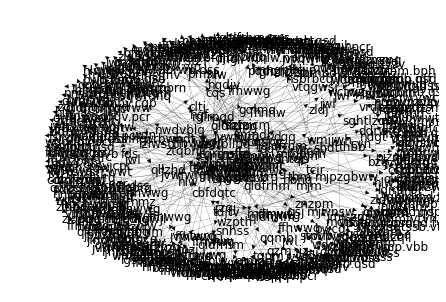

In [36]:
pos = nx.spring_layout(G)

plt = nx.draw(G, pos, node_size=0, style='--', width=0.2)
node_labels = nx.get_node_attributes(G,'name')
plt = nx.draw_networkx_labels(G, pos, labels = node_labels, horizontalalignment='left', verticalalignment='top')

In [37]:
dirSizes = {}
for nd in G.nodes:
    if G.nodes[nd]['type'] == 'dir':
        dsList = list(nx.descendants(G, nd))
        dSize = 0
        for ds in dsList:
            dSize += G.nodes[ds]['size']
        dirSizes[nd] = dSize
# dirSizes

In [39]:
sumCandidates = 0
for d in dirSizes:
    if dirSizes[d] <= 100000:
        sumCandidates += dirSizes[d]
print('Part 1 Answser: ' + str(sumCandidates))

Part 1 Answser: 1182909


In [43]:
sysSize = 70000000
updSize = 30000000
curFree = sysSize - dirSizes[0]
reqFree = updSize - curFree
print('Need to free up ' + str(reqFree))

Need to free up 2677139


In [51]:
candDirs = {}
for (key, value) in dirSizes.items():
    if value >= reqFree:
        candDirs[key] = value
dir2DelIdx = min(candDirs, key=candDirs.get)
dir2DelNm = G.nodes[dir2DelIdx]['name']
print('Part 2 Answer: ' + str(candDirs[dir2DelIdx]))

Part 2 Answer: 2832508
